In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ensembles"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Voting Classifiers 

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

**hard votiong**

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

voting_clf.fit(X_train, y_train)

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.912


**soft voting**

In [4]:
log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", probability=True, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')
voting_clf.fit(X_train, y_train)

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.92


# Bagging and Pasting

In [5]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

#'bootstrap=True' means that bagging is used
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, random_state=42, n_jobs=-1)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.904

**oob score** 

(похоже на использование validation set)

In [6]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, random_state=42, oob_score=True, n_jobs=-1)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.9253333333333333

92.5% - неплохо. Проверим на тестовом наборе по фану

In [7]:
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.904

# RandomForest

In [8]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)

y_pred = rnd_clf.predict(X_train)
acc = accuracy_score(y_train, y_pred)
print("accuracy score by training set: {:.4}%".format(acc*100))

y_pred = rnd_clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("accuracy score by test set: {:.4}%".format(acc*100))

accuracy score by training set: 95.2%
accuracy score by test set: 91.2%


Теперь почти тоже самое, но используя **BagginClassifier**

In [9]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter='random', random_state=42, max_leaf_nodes=16),
    n_estimators=500, max_samples=1.0, bootstrap=True, random_state=42, n_jobs=-1)
bag_clf.fit(X_train, y_train)

y_pred = bag_clf.predict(X_train)
acc = accuracy_score(y_train, y_pred)
print("accuracy score by training set: {:.4}%".format(acc*100))

y_pred = bag_clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("accuracy score by test set: {:.4}%".format(acc*100))

accuracy score by training set: 93.87%
accuracy score by test set: 92.0%


Тоже, но с использованием **ExtraTreesClassifier**

In [10]:
from sklearn.ensemble import ExtraTreesClassifier

extra_clf = ExtraTreesClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
extra_clf.fit(X_train, y_train)

y_pred = extra_clf.predict(X_train)
acc = accuracy_score(y_train, y_pred)
print("accuracy score by training set: {:.4}%".format(acc*100))

y_pred = extra_clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("accuracy score by test set: {:.4}%".format(acc*100))

accuracy score by training set: 92.53%
accuracy score by test set: 91.2%


**Feature impotance / Iris dataset**

In [11]:
from sklearn.datasets import load_iris

iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, random_state=42)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.11249225099876375
sepal width (cm) 0.02311928828251033
petal length (cm) 0.4410304643639577
petal width (cm) 0.4233579963547682


**Feature impotance / MNIST dataset**

In [12]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split 

mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.uint8)

x_train, x_test, y_train, y_test = train_test_split(mnist["data"], mnist["target"], 
                                                    test_size=0.2, random_state=42)

In [13]:
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rnd_clf.fit(x_train, y_train)

y_pred = rnd_clf.predict(x_train)
acc = accuracy_score(y_train, y_pred)
print("accuracy score on training set: {:.4}%".format(acc*100))

y_pred = rnd_clf.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print("accuracy score on test set: {:.4}%".format(acc*100))

accuracy score on training set: 100.0%
accuracy score on test set: 96.73%


(-0.5, 27.5, 27.5, -0.5)

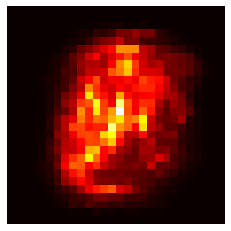

In [14]:
image = rnd_clf.feature_importances_.reshape(28, 28)
plt.imshow(image, cmap = mpl.cm.hot,
               interpolation="nearest")
plt.axis("off")

# Hypothesis Boosting 

**AdaBoost**

In [15]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(x_train, y_train)

y_pred = ada_clf.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print("accuracy score on test set: {:.4}%".format(acc*100))

accuracy score on test set: 78.17%


**Gradient Boostring manually**

In [3]:
np.random.seed(42)
x = np.random.rand(100, 1) - 0.5
y = 3*x[:, 0]**2 + 0.05 * np.random.randn(100)

In [4]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

tree1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree1.fit(x, y)

residual_errors = y - tree1.predict(x)
tree2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree2.fit(x, residual_errors)

residual_errors = residual_errors - tree2.predict(x)
tree3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree3.fit(x, residual_errors)

y_pred = sum(tree.predict(x) for tree in (tree1, tree2, tree3))

print(mean_squared_error(y, y_pred))

0.005038058938993283


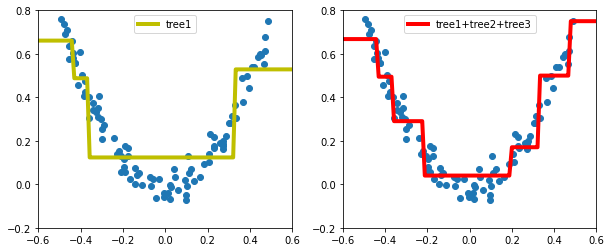

In [18]:
def mplot_graph(x, y, x_train, y_pred, color, label, axis):
    plt.axis([-0.6, 0.6, -0.2, 0.8])
    plt.scatter(x,y)
    plt.plot(x_train, y_pred, c=color, label=label, linewidth=4)
    plt.legend(loc="upper center")


x_new = np.linspace(-0.6, 0.6, 100).reshape(-1,1)
y_new1 = tree1.predict(x_new).reshape(-1,1)
y_new2 = sum(tree.predict(x_new) for tree in (tree1, tree2, tree3)).reshape(-1,1)


axis = np.array([-0.6, 0.6, -0.2, 0.8])
_, axes = plt.subplots(ncols=2, figsize=(10, 4))
plt.sca(axes[0])
mplot_graph(x, y, x_new, y_new1, "y", "tree1", axis)
plt.sca(axes[1])
mplot_graph(x, y, x_new, y_new2, "r", "tree1+tree2+tree3", axis)

**Gradient Boostring using Scikit-Learn’s GradientBoostingRegressor**

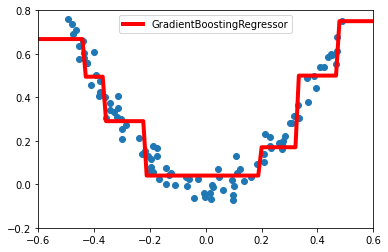

In [19]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)
gbrt.fit(x, y)

y_pred = gbrt.predict(x_new)
mplot_graph(x, y, x_new, y_pred, "r", "GradientBoostingRegressor", axis)

**Gradient Boosting with Early stopping**

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

x_train, x_val, y_train, y_val = train_test_split(x, y, random_state=42)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)
gbrt.fit(x_train, y_train)

print("train error:", mean_squared_error(y_train, gbrt.predict(x_train)))
print("val error:", mean_squared_error(y_val, gbrt.predict(x_val)))

train error: 0.00050843992925804
val error: 0.003010263265992808


In [24]:
gbrt.n_estimators_

120

In [25]:
gbrt.n_estimators_
pred1 = gbrt.staged_predict(x_val)
gbrt.n_estimators_
pred2 = gbrt.staged_predict(x_val)
gbrt.n_estimators_
pred3 = gbrt.staged_predict(x_val)
gbrt.n_estimators_

120

In [23]:
errors = [mean_squared_error(y_val, y_pred)
          for y_pred in gbrt.staged_predict(x_val)]
bst_n_estimators = np.argmin(errors) + 1

print(errors)

[0.05610899559053935, 0.047560923813483064, 0.04124088566823302, 0.03517911550570251, 0.030576406839652973, 0.026637609691987457, 0.023613435122730796, 0.020369427024608137, 0.018277048359280665, 0.016091796347069243, 0.014585571409641585, 0.01314784747126986, 0.01184057668005128, 0.010756151385176995, 0.009974274034504127, 0.009207844894461165, 0.008602269553103259, 0.007962641266526736, 0.007506170396302726, 0.007068179441633813, 0.006572858688497687, 0.006346322118440629, 0.005968251361221339, 0.005585237785665257, 0.005269348108968781, 0.0051132977566933, 0.004918143210452805, 0.004717250988082721, 0.004586540299323291, 0.004476259729372586, 0.004325970755074008, 0.004180526256803691, 0.0041368823736516605, 0.004074456898994263, 0.003990583924138555, 0.0038974999584088436, 0.003814385846946538, 0.0037134828209850574, 0.0036747256319290484, 0.0036377893287685686, 0.0035722601062841775, 0.003539916282594281, 0.0035273286851342117, 0.0034752693583887497, 0.0034106744281530736, 0.00340